In [1]:
!python3 --version

Python 3.11.13


In [2]:
!pip uninstall -y numpy pandas pycaret

Found existing installation: numpy 2.0.2
Uninstalling numpy-2.0.2:
  Successfully uninstalled numpy-2.0.2
Found existing installation: pandas 2.2.2
Uninstalling pandas-2.2.2:
  Successfully uninstalled pandas-2.2.2


In [3]:
!pip install numpy==1.24.4 pandas==2.0.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 152.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 173.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.0.3 which is incompatible.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.24.4 which is incompatible.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
mizani 0.13.5 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.24.4 which is incompatible.
plotnine 0.14.6 requires pandas>=2.2.0, but you have pandas 2.0.3 which is incompatible.
pymc 5.23.0 req

In [1]:
import numpy, pandas, sklearn
print("numpy:", numpy.__version__)
print("pandas:", pandas.__version__)
print("sklearn:", sklearn.__version__)

numpy: 1.24.4
pandas: 2.0.3
sklearn: 1.6.1


In [2]:
!pip install pycaret==3.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 6.4 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 145.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.0/69.0 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 174.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.

In [1]:
import pandas as pd
import numpy as np
from pycaret.classification import setup

## Upload Files

Use https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv and https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=test.csv to download the files, and then upload in the next cell.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [3]:
!ls /content/

logs.log  sample_data  test.csv  train.csv


## Load the data and perform quick cleaning

In [4]:
import pandas as pd
import numpy as np

# Use the file from Kaggle or your uploaded file name
csv_path = "/content/train.csv"
df_raw = pd.read_csv(csv_path)

# Basic shape and peek
print(df_raw.shape)
df_raw.head(3)

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [5]:
df = df_raw.copy()
df.columns = [c.strip().replace(" ", "_") for c in df.columns]  # safe colnames

# Remove obvious IDs from training features (keep to align with test if you later predict for Kaggle)
id_col = 'Id' if 'Id' in df.columns else None

# Confirm target
assert 'SalePrice' in df.columns, "SalePrice not found in columns."
df['SalePrice'].describe()


,SalePrice
count,1460.000000
mean,180921.195890
std,79442.502883
min,34900.000000
25%,129975.000000
50%,163000.000000
75%,214000.000000
max,755000.000000


## Create an external holdout

In [6]:
from sklearn.model_selection import train_test_split

df_train, df_holdout = train_test_split(
    df, test_size=0.2, random_state=42
)
df_train.shape, df_holdout.shape


((1168, 81), (292, 81))

## Target transformation: create a log target

In [8]:
df_train = df_train.copy()
df_holdout = df_holdout.copy()

df_train['SalePrice_Log'] = np.log1p(df_train['SalePrice'])
df_holdout['SalePrice_Log'] = np.log1p(df_holdout['SalePrice'])

target_col = 'SalePrice_Log'


## PyCaret Regression — setup (GPU, robust imputations, feature handling)

In [10]:
from pycaret.regression import *

exp = setup(
    data=df_train.drop(columns=[id_col]) if id_col else df_train,
    target=target_col,
    train_size=0.85,             # internal CV split within df_train
    session_id=42,
    use_gpu=True,                # GPU for supported learners
    fold=5,
    normalize=True,              # helpful for linear models
    categorical_imputation='mode',
    numeric_imputation='median',
    rare_to_value=None,              # you can set rare handling if needed
    remove_multicollinearity=False,  # optional; can experiment True
    # You can add polynomial_features=True for experimentation, but start simple
)


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA A100-SXM4-40GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more le

,Description,Value
0,Session id,42
1,Target,SalePrice_Log
2,Target type,Regression
3,Original data shape,"(1168, 81)"
4,Transformed data shape,"(1168, 280)"
5,Transformed train set shape,"(992, 280)"
6,Transformed test set shape,"(176, 280)"
7,Numeric features,37
8,Categorical features,43
9,Rows with missing values,100.0%


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Info] Using GPU Device: NVIDIA A100-SXM4-40GB, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 16 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Warning] GPU acceleration is disabled because no non-trivial dense features can be found
[LightGBM] [Info] Start training from score 0.500000
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more le

## AutoML: compare models

In [11]:
best = compare_models(sort='RMSE')  # minimizing RMSE on log target
best


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0048,0.0004,0.0137,0.9976,0.0011,0.0004,1.3480
dt,Decision Tree Regressor,0.0060,0.0007,0.0227,0.9953,0.0018,0.0005,0.6820
et,Extra Trees Regressor,0.0100,0.0009,0.0285,0.9938,0.0022,0.0008,1.0180
xgboost,Extreme Gradient Boosting,0.0093,0.0011,0.0305,0.9931,0.0025,0.0008,1.1660
ada,AdaBoost Regressor,0.0235,0.0012,0.0341,0.9920,0.0026,0.0020,0.9940
lightgbm,Light Gradient Boosting Machine,0.0159,0.0027,0.0490,0.9826,0.0039,0.0014,1.9700
huber,Huber Regressor,0.0567,0.0099,0.0984,0.9356,0.0076,0.0048,0.8860
ridge,Ridge Regression,0.0638,0.0100,0.0993,0.9347,0.0077,0.0053,0.6860
lr,Linear Regression,0.0639,0.0100,0.0995,0.9344,0.0077,0.0053,0.9920
br,Bayesian Ridge,0.0661,0.0111,0.1045,0.9269,0.0081,0.0056,0.8100


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

[2025-11-05 07:04:37.717] [CUML] [info] Unused keyword parameter: n_jobs during cuML estimator initialization


GradientBoostingRegressor(random_state=42)

In [12]:
leaderboard = pull()
leaderboard.head(10)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0048,0.0004,0.0137,0.9976,0.0011,0.0004,1.348
dt,Decision Tree Regressor,0.0060,0.0007,0.0227,0.9953,0.0018,0.0005,0.682
et,Extra Trees Regressor,0.0100,0.0009,0.0285,0.9938,0.0022,0.0008,1.018
xgboost,Extreme Gradient Boosting,0.0093,0.0011,0.0305,0.9931,0.0025,0.0008,1.166
ada,AdaBoost Regressor,0.0235,0.0012,0.0341,0.9920,0.0026,0.0020,0.994
lightgbm,Light Gradient Boosting Machine,0.0159,0.0027,0.0490,0.9826,0.0039,0.0014,1.970
huber,Huber Regressor,0.0567,0.0099,0.0984,0.9356,0.0076,0.0048,0.886
ridge,Ridge Regression,0.0638,0.0100,0.0993,0.9347,0.0077,0.0053,0.686
lr,Linear Regression,0.0639,0.0100,0.0995,0.9344,0.0077,0.0053,0.992
br,Bayesian Ridge,0.0661,0.0111,0.1045,0.9269,0.0081,0.0056,0.810


## Train top candidates + hyperparameter tuning

In [13]:
# Choosing top 3 from the above leaderboard.
gbr  = create_model('gbr')
dt = create_model('dt')
et = create_model('et')

gbr_tuned  = tune_model(gbr,  optimize='RMSE', choose_better=True)
dt_tuned = tune_model(dt, optimize='RMSE', choose_better=True)
et_tuned = tune_model(et, optimize='RMSE', choose_better=True)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0048,0.0001,0.0120,0.9991,0.0009,0.0004
1,0.0037,0.0000,0.0054,0.9998,0.0004,0.0003
2,0.0085,0.0017,0.0408,0.9894,0.0034,0.0007
3,0.0033,0.0000,0.0049,0.9998,0.0004,0.0003
4,0.0036,0.0000,0.0051,0.9998,0.0004,0.0003
Mean,0.0048,0.0004,0.0137,0.9976,0.0011,0.0004
Std,0.0019,0.0006,0.0138,0.0041,0.0012,0.0002


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0065,0.0004,0.0203,0.9976,0.0015,0.0005
1,0.0042,0.0001,0.0121,0.9990,0.0010,0.0004
2,0.0102,0.0027,0.0516,0.9830,0.0044,0.0009
3,0.0053,0.0003,0.0165,0.9981,0.0013,0.0004
4,0.0040,0.0002,0.0128,0.9988,0.0009,0.0003
Mean,0.0060,0.0007,0.0227,0.9953,0.0018,0.0005
Std,0.0023,0.0010,0.0148,0.0062,0.0013,0.0002


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0083,0.0004,0.0210,0.9974,0.0015,0.0007
1,0.0109,0.0010,0.0321,0.9932,0.0026,0.0009
2,0.0132,0.0025,0.0497,0.9843,0.0041,0.0011
3,0.0080,0.0004,0.0190,0.9975,0.0014,0.0007
4,0.0094,0.0004,0.0209,0.9969,0.0016,0.0008
Mean,0.0100,0.0009,0.0285,0.9938,0.0022,0.0008
Std,0.0019,0.0008,0.0115,0.0050,0.0010,0.0002


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0557,0.0053,0.0726,0.9689,0.0055,0.0046
1,0.0470,0.0038,0.0613,0.9752,0.0048,0.0039
2,0.0565,0.0084,0.0918,0.9462,0.0073,0.0048
3,0.0535,0.0043,0.0655,0.9702,0.0050,0.0044
4,0.0529,0.0040,0.0633,0.9711,0.0048,0.0044
Mean,0.0531,0.0052,0.0709,0.9663,0.0055,0.0044
Std,0.0033,0.0017,0.0111,0.0103,0.0009,0.0003


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0297,0.0019,0.0438,0.9887,0.0035,0.0025
1,0.0281,0.0015,0.0388,0.9901,0.0031,0.0023
2,0.0342,0.0034,0.0587,0.9780,0.0047,0.0029
3,0.0279,0.0011,0.0329,0.9925,0.0025,0.0023
4,0.0281,0.0012,0.0351,0.9911,0.0027,0.0023
Mean,0.0296,0.0018,0.0419,0.9881,0.0033,0.0025
Std,0.0024,0.0009,0.0092,0.0052,0.0008,0.0002


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1102,0.0289,0.1701,0.8294,0.0132,0.0092
1,0.1007,0.0236,0.1535,0.8445,0.0120,0.0084
2,0.1108,0.0357,0.1889,0.7725,0.0149,0.0093
3,0.1045,0.0217,0.1475,0.8487,0.0112,0.0087
4,0.0996,0.0215,0.1467,0.8447,0.0113,0.0083
Mean,0.1052,0.0263,0.1613,0.8280,0.0125,0.0088
Std,0.0047,0.0054,0.0161,0.0285,0.0014,0.0004


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [14]:
blended = blend_models([gbr_tuned, dt_tuned, et_tuned], optimize='RMSE', choose_better=True)
final_candidate = blended


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0050,0.0002,0.0152,0.9986,0.0011,0.0004
1,0.0043,0.0001,0.0097,0.9994,0.0007,0.0004
2,0.0090,0.0020,0.0445,0.9874,0.0037,0.0008
3,0.0039,0.0001,0.0078,0.9996,0.0006,0.0003
4,0.0038,0.0000,0.0069,0.9997,0.0005,0.0003
Mean,0.0052,0.0005,0.0168,0.9969,0.0013,0.0004
Std,0.0019,0.0008,0.0141,0.0048,0.0012,0.0002


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

Original model was better than the blended model, hence it will be returned. NOTE: The display metrics are for the blended model (not the original one).


## Diagnostics & model interpretation

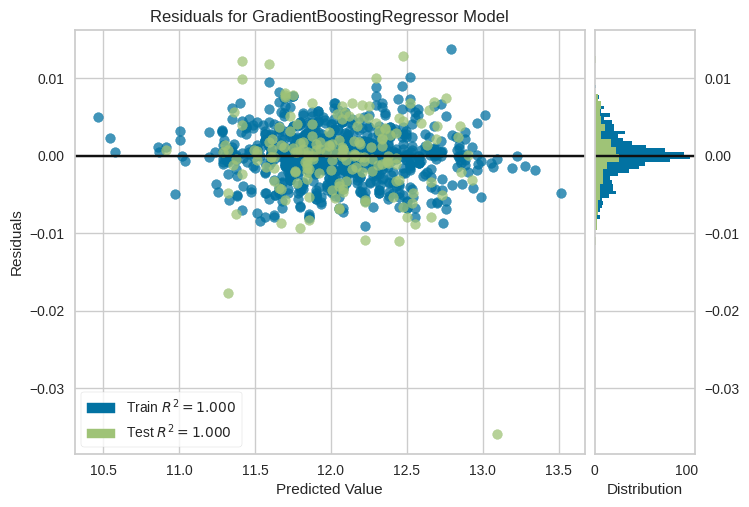

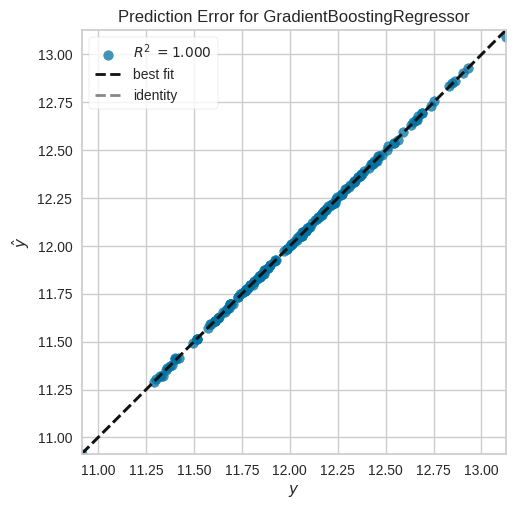

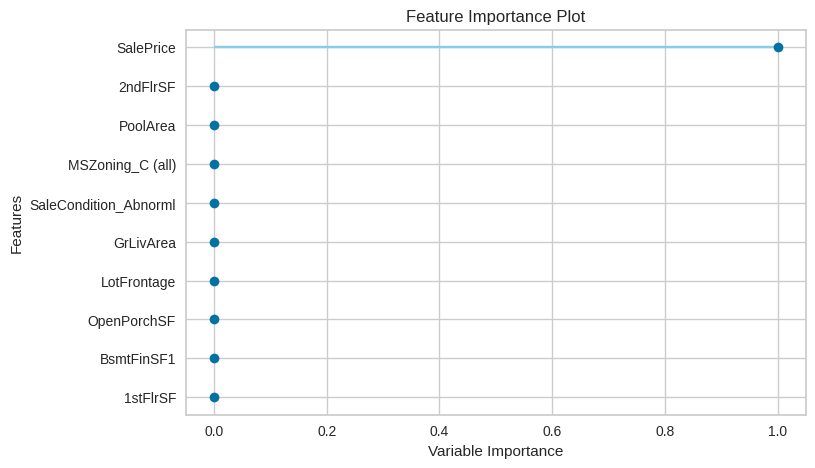

In [16]:
# Residuals on CV folds (still on log target)
plot_model(final_candidate, plot='residuals')

# Error distribution
plot_model(final_candidate, plot='error')

# Feature importance (global)
plot_model(final_candidate, plot='feature')


## Finalize and evaluate on the external holdout

In [17]:
final_model = finalize_model(final_candidate)

Make predictions on the holdout and back-transform to the original scale:

In [19]:
# Predict log target on holdout
pred_log = predict_model(final_model, data=df_holdout)

# Back-transform to dollars
pred_log = pred_log.rename(columns={'prediction_label': 'Pred_Log'})
pred_log['Pred_SalePrice'] = np.expm1(pred_log['Pred_Log'])

# Compute metrics on original scale
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_true = df_holdout['SalePrice'].values
y_pred = pred_log['Pred_SalePrice'].values

rmse  = mean_squared_error(y_true, y_pred, squared=False)
mae   = mean_absolute_error(y_true, y_pred)
r2    = r2_score(y_true, y_pred)

rmse, mae, r2


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,0.0054,0.0002,0.0150,0.9988,0.0011,0.0005


(7551.130364754259, 1162.6427241425013, 0.992566213190244)

## Save the pipeline (for batch/Gradio use later)

In [20]:
save_path = "houseprices_regressor_best"
save_model(final_model, save_path)


Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MSSubClass', 'LotFrontage',
                                              'LotArea', 'OverallQual',
                                              'OverallCond', 'YearBuilt',
                                              'YearRemodAdd', 'MasVnrArea',
                                              'BsmtFinSF1', 'BsmtFinSF2',
                                              'BsmtUnfSF', 'TotalBsmtSF',
                                              '1stFlrSF', '2ndFlrSF',
                                              'LowQualFinSF', 'GrLivArea',
                                              'BsmtFullBath', 'BsmtHalfBath',
                                              'FullBath', 'HalfBath...
                                                                     'Foundation',
                                                                     'BsmtQual',
                  